# Sentiment Analysis
In this project we will use amazon reviews to work through a sentiment analysis using both the Afinn package, and the nltk.sentiment.vader packages in python. Through this analysis, we will compare the packages for performance, as well as gain an understanding of the most common positive and negative words, and the overal sentiment of the text.
    
The code, along with the files necessary and versions of packages in this instance can be found on this repo: https://github.com/Benjamin-Siebold/MSDS-682-Text-Analytics
        

In [1]:
import matplotlib.pyplot as plt
from afinn import Afinn
import pandas as pd
import numpy as np
import spacy
import nltk
from nltk.corpus import subjectivity
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
nlp = spacy.load('en_core_web_lg')
np.random.seed(50)
pd.options.display.max_rows = 20
nlp.max_length = 1000000000
afinn = Afinn()

### 1 - Import and Clean Data
Before we apply any sentiment analysis, we must first load the data in and clean it for analysis. Because we are looking at sentiment, we lemmatized the words to get a smaller amount of words to apply sentiment to, and removed proper pronouns and numbers. The dataset chosen for this analysis is the reviews of home and kitchen goods, purely because we are in the process of remodeling and it seemed like a fitting topic.

In [2]:
def clean_text(text):
    nlp_text = nlp(text)
    lemmas = [w.lower_ if w.lemma_ == '-PRON-' else w.lemma_ 
              for w in nlp_text if w.is_alpha and not w.is_stop and w.pos_ != 'PROPN' and w.pos_ != 'NUM']
    return ' '.join(lemmas)

In [3]:
home_reviews = pd.read_json('reviews_Home_and_Kitchen_5.json.gz', lines=True)

In [ ]:
p.write_json('reviews_Home_and_Kitchen_5', lines=True)

In [4]:
home_reviews.head(5)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0615391206,"[0, 0]",5,My daughter wanted this book and the price on ...,"10 19, 2013",APYOBQE6M18AA,Martin Schwartz,Best Price,1382140800
1,0615391206,"[0, 0]",5,I bought this zoku quick pop for my daughterr ...,"06 18, 2014",A1JVQTAGHYOL7F,Michelle Dinh,zoku,1403049600
2,0615391206,"[26, 27]",4,There is no shortage of pop recipes available ...,"05 5, 2013",A3UPYGJKZ0XTU4,mirasreviews,"Excels at Sweet Dessert Pops, but Falls Short ...",1367712000
3,0615391206,"[14, 18]",5,This book is a must have if you get a Zoku (wh...,"08 4, 2011",A2MHCTX43MIMDZ,"M. Johnson ""Tea Lover""",Creative Combos,1312416000
4,0615391206,"[0, 0]",4,This cookbook is great. I have really enjoyed...,"06 7, 2014",AHAI85T5C2DH3,PugLover,A must own if you own the Zoku maker...,1402099200


In [5]:
home_reviews = home_reviews[['reviewText','summary']]

In [6]:
review_sample = home_reviews['reviewText'].sample(2500)

In [7]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [8]:
cleaned_reviews = clean_text(' '.join(review_sample))

### 2 - Apply vader and Afinn
Next in our analysis we apply both the vader package from nltk and afinn to get insight into the top positive and negative words from each, along with the mean sentiment from each.

In [9]:
words = cleaned_reviews.strip().split()
scores = []
for word in words:
    scores.append(sentiment_analyzer.polarity_scores(word))

In [10]:
word_score = pd.DataFrame(scores, words)

In [11]:
word_score.replace(0, np.nan, inplace=True)
word_score.reset_index(level=0, inplace=True)
word_score.rename(columns={'index':'words'}, inplace=True)

In [12]:
word_score

,words,compound,neg,neu,pos
0,job,NaN,NaN,1.0,NaN
1,design,NaN,NaN,1.0,NaN
2,nice,0.4215,NaN,NaN,1.0
3,compact,NaN,NaN,1.0,NaN
4,like,0.3612,NaN,NaN,1.0
5,bowl,NaN,NaN,1.0,NaN
6,hold,NaN,NaN,1.0,NaN
7,measure,NaN,NaN,1.0,NaN
8,juice,NaN,NaN,1.0,NaN
9,live,NaN,NaN,1.0,NaN


In [13]:
afinn_scores = []

for word in words:
    afinn_scores.append(afinn.score(word))

In [14]:
afinn_word_score = pd.DataFrame(afinn_scores,words, columns = ['score']).sort_values(by='score')
afinn_word_score.replace(0, np.nan, inplace=True)
afinn_word_score.reset_index(level=0, inplace=True)
afinn_word_score.rename(columns={'index':'words'}, inplace=True)
afinn_pos = afinn_word_score[afinn_word_score['score'] > 0]
afinn_neg = afinn_word_score[afinn_word_score['score'] < 0]

In [15]:
word_score.groupby([words,'compound']).count().sort_values(by='pos', ascending=False).head(10)

,,words,neg,neu,pos
,compound,,,,
like,0.3612,999,0,0,999
great,0.6249,877,0,0,877
good,0.4404,848,0,0,848
easy,0.4404,622,0,0,622
love,0.6369,554,0,0,554
clean,0.4019,517,0,0,517
nice,0.4215,455,0,0,455
want,0.0772,389,0,0,389
fit,0.3612,320,0,0,320


In [16]:
afinn_pos.groupby(['words']).count().sort_values(by='score', ascending=False).head(10)

,score
words,
like,999
great,877
good,848
easy,622
love,554
clean,517
nice,455
want,389
fit,320


In [17]:
word_score.groupby([words,'compound']).count().sort_values(by='neg', ascending=False).head(10)

,,words,neg,neu,pos
,compound,,,,
problem,-0.4019,259,259,0,0
hard,-0.1027,187,187,0,0
cut,-0.2732,185,185,0,0
leave,-0.0516,160,160,0,0
low,-0.2732,117,117,0,0
pay,-0.1027,88,88,0,0
bad,-0.5423,86,86,0,0
stop,-0.2960,75,75,0,0
leak,-0.3400,60,60,0,0


In [18]:
afinn_neg.groupby(['words']).count().sort_values(by='score', ascending=False).head(10)

,score
words,
problem,259
hard,187
cut,185
leave,160
pay,88
bad,86
stop,75
leak,60
drop,58


In [19]:
word_score_values = pd.DataFrame(word_score['compound'].value_counts())
word_score_values.reset_index(level=0, inplace=True)
word_score_values.rename(columns={'index':'score', 'compound':'count'}, inplace=True)
word_score_values['total_score'] = word_score_values['score']*word_score_values['count']

In [20]:
word_score_values.describe()

,score,count,total_score
count,66.000000,66.000000,66.000000
mean,-0.021011,261.318182,64.894239
std,0.426949,392.647548,192.252086
min,-0.690800,3.000000,-183.668300
25%,-0.416600,51.500000,-19.552800
50%,-0.038700,118.500000,-0.579100
75%,0.376650,299.750000,60.851950
max,0.636900,2195.000000,966.678000


In [21]:
word_score_values['total_score'].sum()/word_score_values['count'].sum()

0.24833419145358612

In [22]:
afinn_word_score_values = pd.DataFrame(afinn_word_score['score'].value_counts())
afinn_word_score_values.reset_index(level=0, inplace=True)
afinn_word_score_values.rename(columns={'index':'score', 'score':'count'}, inplace=True)
afinn_word_score_values['total_score'] = afinn_word_score_values['score']*afinn_word_score_values['count']

In [23]:
afinn_word_score_values.describe()

,score,count,total_score
count,9.000000,9.000000,9.000000
mean,0.444444,1742.111111,2203.000000
std,3.395258,1776.975692,5182.342448
min,-5.000000,1.000000,-3124.000000
25%,-2.000000,295.000000,-1377.000000
50%,1.000000,1512.000000,120.000000
75%,3.000000,3197.000000,3197.000000
max,5.000000,4539.000000,12270.000000


In [24]:
afinn_word_score_values['total_score'].sum()/afinn_word_score_values['count'].sum()

1.2645576886281014

### 3 - Understand sentiment

From above, we can see Afinn only applies 10 options for sentiment, whole numbers between -5 and 5. Vader on the other hand gives 66 different sentiment levels depending on the word. Both Afinn and vader seem to have similar top negative and positive words (like, great, easy for positive) (hard, problem, cut for negative) with the biggest difference being Afinn didn't include low in it's negatives, and vader didn't include quality in it's positives. Additionally, the afinn scoring seems to have a slightly more negative sentiment average than vader.

We see below that vader finds quality to be a nuetral, and the afinn package has given the word low a score of 0.0. This shows that different sentiment packages apply different scorings to words, and thus have subjectivity in them.

In [25]:
afinn_word_score[afinn_word_score['words'] == 'low'].head(1)

,words,score
3821,low,NaN


In [26]:
afinn.score('low')

0.0

In [27]:
word_score[word_score['words'] == 'quality'].head(1)

,words,compound,neg,neu,pos
67,quality,NaN,NaN,1.0,NaN


### 4 - Build Visuals
The last step is to build a few visuals of the data to get the rest of the comparison. To do this, we will build frequency charts of the sentiment scores available in both afinn and vader.

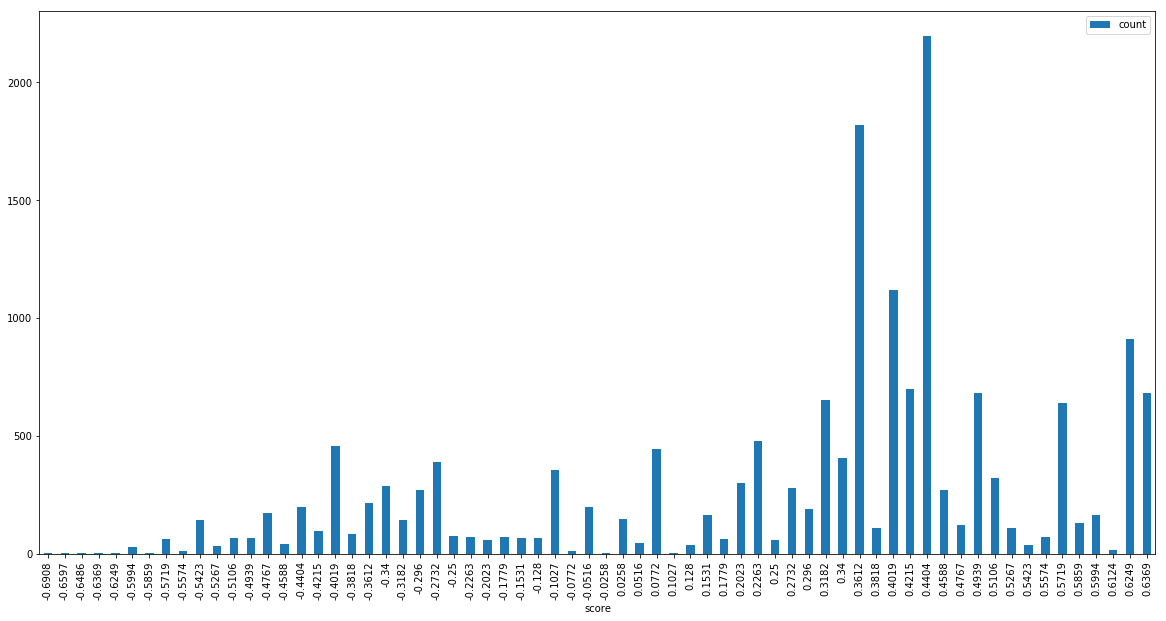

In [28]:
word_score_values.sort_values(by='score').plot.bar(x='score', y='count', figsize=(20,10))

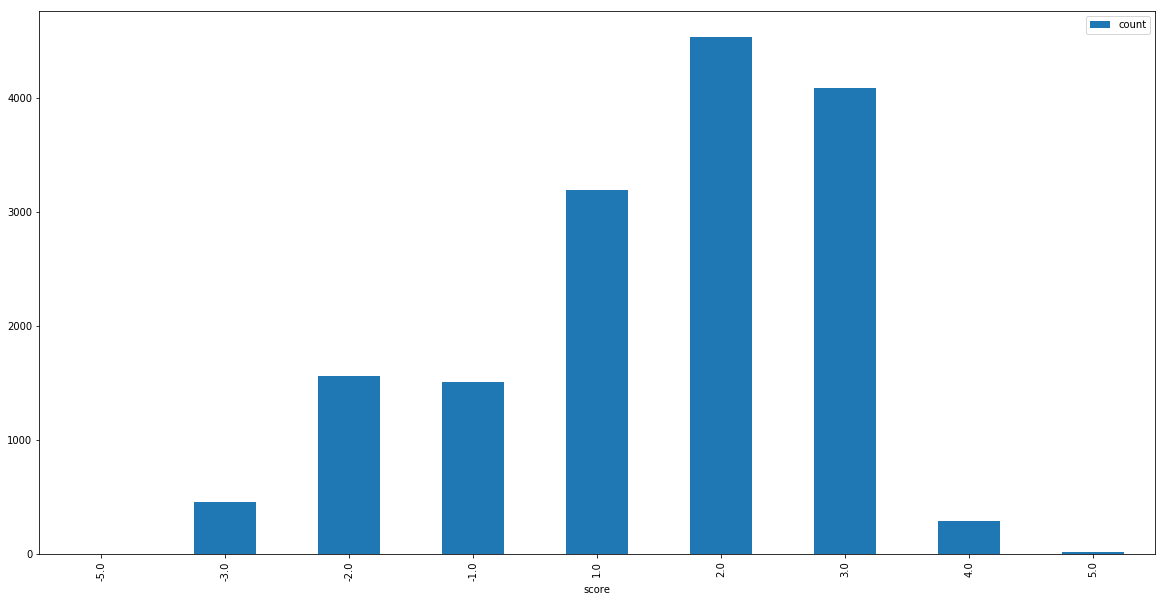

In [29]:
afinn_word_score_values.sort_values(by='score').plot.bar(x='score', y='count', figsize=(20,10))

From the visuals above we can see one of the main issues with Afinn is the size of it's dictionary. There are many words with a nuetral (0.0) classification for sentiment which does not appear in the vader package. Although their means are close to the same for overall sentiment, the missing data in Afinn suggests it is less accurate. Next steps would be to additionally perform a NB training of sentiments and compare to vader because the text being analyzed is not social media data. The subjectivity shown in step 3 may indicate a trained classifier for sentiment may be better because certain words (such as low or quality) may have either positive, negative, or nuetral sentiment depending on the context (i.e. social media, product reviews, etc.)